[thoughts]: **random forest**  <br>
each instance (user) build a decision tree, and explore the relationship becomes stress

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns

In [157]:
education = pd.read_csv('education_survey.csv',sep=',')
education.head()

,uid,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,perceived-stress-scale-survey-post
0,u00,NaN,144.0,3.6,2.9
1,u01,2.863,5.0,3.1,3.2
2,u02,3.505,0.0,2.9,3.7
3,u03,NaN,30.0,1.9,2.8
4,u04,3.029,1.0,2.9,3.1


In [158]:
ema = pd.read_csv('EMA_data.csv',sep=',')
ema = ema.drop('stress', axis = 1)
ema.head()

,user_id,sleep,exercise,social,activity__working_alone,activity__working_others,activity__relaxing_alone,activity__relaxing_others,behavior__anxious,behavior__calm,behavior__conventional,behavior__critical,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad
0,0,7.109091,2.000000,2.954545,2.052632,2.684211,1.578947,1.473684,2.000000,3.714286,2.714286,1.142857,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50
1,1,7.222222,1.000000,3.500000,1.666667,2.000000,2.333333,3.333333,1.666667,4.000000,4.000000,1.000000,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00
2,2,7.923077,2.000000,2.800000,2.250000,2.375000,1.000000,2.000000,2.000000,3.000000,2.000000,3.600000,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00
3,3,8.071429,1.875000,1.550000,2.545455,1.090909,1.909091,1.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
4,4,6.470588,4.083333,3.074074,1.923077,1.846154,2.846154,2.461538,2.086957,3.956522,2.760870,2.369565,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75


In [159]:
def get_clean_userId(row):
    user_id = row[1:]
    return user_id

education.uid = education.uid.apply(get_clean_userId)
education.uid = education.uid.astype('int')
education = education.rename(columns = {'uid':'user_id'})
education.head()

,user_id,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,perceived-stress-scale-survey-post
0,0,NaN,144.0,3.6,2.9
1,1,2.863,5.0,3.1,3.2
2,2,3.505,0.0,2.9,3.7
3,3,NaN,30.0,1.9,2.8
4,4,3.029,1.0,2.9,3.1


In [160]:
#### merge two dataframes together
join_df = pd.merge(education,ema,how='left',on='user_id') # left join the two dataframes
join_df.head()

,user_id,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,perceived-stress-scale-survey-post,sleep,exercise,social,activity__working_alone,activity__working_others,...,behavior__conventional,behavior__critical,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad
0,0,NaN,144.0,3.6,2.9,7.109091,2.000000,2.954545,2.052632,2.684211,...,2.714286,1.142857,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50
1,1,2.863,5.0,3.1,3.2,7.222222,1.000000,3.500000,1.666667,2.000000,...,4.000000,1.000000,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00
2,2,3.505,0.0,2.9,3.7,7.923077,2.000000,2.800000,2.250000,2.375000,...,2.000000,3.600000,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00
3,3,NaN,30.0,1.9,2.8,8.071429,1.875000,1.550000,2.545455,1.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
4,4,3.029,1.0,2.9,3.1,6.470588,4.083333,3.074074,1.923077,1.846154,...,2.760870,2.369565,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75


In [161]:
join_df.columns.tolist()

['user_id',
 ' gpa all',
 'piazza-contribution',
 'perceived-stress-scale-survey-pre',
 'perceived-stress-scale-survey-post',
 'sleep',
 'exercise',
 'social',
 'activity__working_alone',
 'activity__working_others',
 'activity__relaxing_alone',
 'activity__relaxing_others',
 'behavior__anxious',
 'behavior__calm',
 'behavior__conventional',
 'behavior__critical',
 'behavior__dependable',
 'behavior__disorganized',
 'behavior__enthusiastic',
 'behavior__experiences',
 'behavior__reserved',
 'behavior__sympathetic',
 'mood__happy',
 'mood__sad']

In [162]:
join_df.to_csv('combined_data.csv',encoding = 'UTF-8', index = False)

In [135]:
mean_stress = np.mean(join_df['perceived-stress-scale-survey-pre']) 
print('Mean stress scale: ',mean_stress)

Mean stress scale:  3.0867149758478263


In [136]:
#### replace na values to mean value
join_df['perceived-stress(mean_replace)'] = join_df['perceived-stress-scale-survey-pre'].replace(np.nan, mean_stress)
join_df.head()

,user_id,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,perceived-stress-scale-survey-post,sleep,exercise,social,activity__working_alone,activity__working_others,...,behavior__critical,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad,perceived-stress(mean_replace)
0,0,NaN,144.0,3.6,2.9,7.109091,2.000000,2.954545,2.052632,2.684211,...,1.142857,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50,3.6
1,1,2.863,5.0,3.1,3.2,7.222222,1.000000,3.500000,1.666667,2.000000,...,1.000000,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00,3.1
2,2,3.505,0.0,2.9,3.7,7.923077,2.000000,2.800000,2.250000,2.375000,...,3.600000,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00,2.9
3,3,NaN,30.0,1.9,2.8,8.071429,1.875000,1.550000,2.545455,1.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.9
4,4,3.029,1.0,2.9,3.1,6.470588,4.083333,3.074074,1.923077,1.846154,...,2.369565,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75,2.9


In [137]:
#### replace na values to 0
join_df['perceived-stress(zero_replace)'] = join_df['perceived-stress-scale-survey-pre'].replace(np.nan, 0)
join_df.head()

,user_id,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,perceived-stress-scale-survey-post,sleep,exercise,social,activity__working_alone,activity__working_others,...,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad,perceived-stress(mean_replace),perceived-stress(zero_replace)
0,0,NaN,144.0,3.6,2.9,7.109091,2.000000,2.954545,2.052632,2.684211,...,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50,3.6,3.6
1,1,2.863,5.0,3.1,3.2,7.222222,1.000000,3.500000,1.666667,2.000000,...,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00,3.1,3.1
2,2,3.505,0.0,2.9,3.7,7.923077,2.000000,2.800000,2.250000,2.375000,...,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00,2.9,2.9
3,3,NaN,30.0,1.9,2.8,8.071429,1.875000,1.550000,2.545455,1.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.9,1.9
4,4,3.029,1.0,2.9,3.1,6.470588,4.083333,3.074074,1.923077,1.846154,...,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75,2.9,2.9


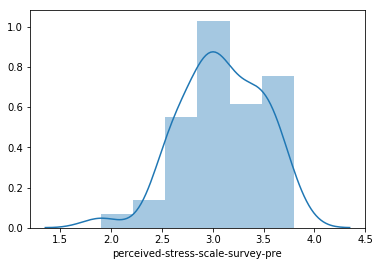

In [141]:
sns.distplot(join_df['perceived-stress-scale-survey-pre'], bins = 6) 

P.s: set bins = 6 to most represent the characteristics of distribution

The student scale level follow normal distribution --> good <br>
baseline 1: set the mean stress value as one baseline, which is about 3.08

In [96]:
join_df['perceived-stress-scale-survey-pre'].describe()

count    60.000000
mean      3.086715
std       0.349445
min       1.900000
25%       2.900000
50%       3.086715
75%       3.300000
max       3.800000
Name: perceived-stress-scale-survey-pre, dtype: float64

The standard deviation of the student stress scale is 0.349, which is not very large. It indicates that stress levels are not that different among the students .

In [143]:
number_above_average = len(join_df[join_df['perceived-stress-scale-survey-pre'] > 3.086715]) # 共23人平均stress scale > average
abover_average_portion = number_above_average / len(join_df)
abover_average_portion  

0.38333333333333336

38.33% of students are above average stress scale

In [144]:
mean_mood_sad = np.mean(join_df['mood__sad'])

In [147]:
#### replace the na values in joined df as mean value
join_df['mood__sad'] = join_df['mood__sad'].replace(np.nan, mean_mood_sad)

In [148]:
# corr()
join_df['mood__sad'].corr(join_df['perceived-stress-scale-survey-pre'])

0.41603161310854164

"mood__sad" and stress scale are not that related to each other.

Random guessing baseline: <br>
stress scale from 1-5, so we can set threshold to be 2.5 to decide whether the student is stress or not. Among all students, 75% of them are perceived as stress, and about 16% are perceived as not stress. So one random guessing of our system can be: 75% of students would classify as "stress" and about 16% are not.

In [ ]:
join_df['stress_or_not'] = join_df[join_df['perceived-stress-scale-survey-pre'] >= 2.5]

In [150]:
stress_number = len(join_df[join_df['perceived-stress-scale-survey-pre'] >= 2.5])
non_stress_number = len(join_df[join_df['perceived-stress-scale-survey-pre'] < 2.5])

In [153]:
stress_number / len(join_df) # 0.75
non_stress_number / len(join_df) # 0.16

0.016666666666666666

In [163]:
# pair_plot = sns.pairplot(join_df)
# pair_plot.savefig('pairplot.png')

In [173]:
def stress_or_not(c):
    if c['perceived-stress-scale-survey-pre'] >= 2.5:
        return 1   # use 1 to denote "stress"
    elif c['perceived-stress-scale-survey-pre'] < 2.5:
        return 0   # use 0 to denote "non stress"
    else:
        return np.nan

join_df['stress_or_not'] = join_df.apply(stress_or_not, axis=1)
join_df.head()

,user_id,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,perceived-stress-scale-survey-post,sleep,exercise,social,activity__working_alone,activity__working_others,...,behavior__critical,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad,stress_or_not
0,0,NaN,144.0,3.6,2.9,7.109091,2.000000,2.954545,2.052632,2.684211,...,1.142857,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50,1.0
1,1,2.863,5.0,3.1,3.2,7.222222,1.000000,3.500000,1.666667,2.000000,...,1.000000,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00,1.0
2,2,3.505,0.0,2.9,3.7,7.923077,2.000000,2.800000,2.250000,2.375000,...,3.600000,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00,1.0
3,3,NaN,30.0,1.9,2.8,8.071429,1.875000,1.550000,2.545455,1.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.0
4,4,3.029,1.0,2.9,3.1,6.470588,4.083333,3.074074,1.923077,1.846154,...,2.369565,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75,1.0


In [174]:
join_df.columns.tolist()

['user_id',
 ' gpa all',
 'piazza-contribution',
 'perceived-stress-scale-survey-pre',
 'perceived-stress-scale-survey-post',
 'sleep',
 'exercise',
 'social',
 'activity__working_alone',
 'activity__working_others',
 'activity__relaxing_alone',
 'activity__relaxing_others',
 'behavior__anxious',
 'behavior__calm',
 'behavior__conventional',
 'behavior__critical',
 'behavior__dependable',
 'behavior__disorganized',
 'behavior__enthusiastic',
 'behavior__experiences',
 'behavior__reserved',
 'behavior__sympathetic',
 'mood__happy',
 'mood__sad',
 'stress_or_not']

In [175]:
join_df_classified = join_df.drop(columns = ['perceived-stress-scale-survey-pre','perceived-stress-scale-survey-post'])
join_df_classified.head()

,user_id,gpa all,piazza-contribution,sleep,exercise,social,activity__working_alone,activity__working_others,activity__relaxing_alone,activity__relaxing_others,...,behavior__critical,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad,stress_or_not
0,0,NaN,144.0,7.109091,2.000000,2.954545,2.052632,2.684211,1.578947,1.473684,...,1.142857,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50,1.0
1,1,2.863,5.0,7.222222,1.000000,3.500000,1.666667,2.000000,2.333333,3.333333,...,1.000000,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00,1.0
2,2,3.505,0.0,7.923077,2.000000,2.800000,2.250000,2.375000,1.000000,2.000000,...,3.600000,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00,1.0
3,3,NaN,30.0,8.071429,1.875000,1.550000,2.545455,1.090909,1.909091,1.727273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.0
4,4,3.029,1.0,6.470588,4.083333,3.074074,1.923077,1.846154,2.846154,2.461538,...,2.369565,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75,1.0


In [251]:
X = join_df_classified.iloc[:,1:-1].astype('float64')
y = join_df_classified.iloc[:,-1].astype('float64')

In [252]:
y = y.replace(np.nan,0)  # replace np.nan to 0

In [253]:
#### decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [254]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.73


In [255]:
import collections
counter_lst = collections.Counter(y_pred)
counter_lst[1]/len(y_pred)  # 0.6

0.6

only 60% of students are classified as "stress" by the decision tree classifier, which is smaller than what we would expect as the 75% of students are perceived as stress in the original data set. The decision tree classifier reports a 80% accuracy though, the results seem not bad.

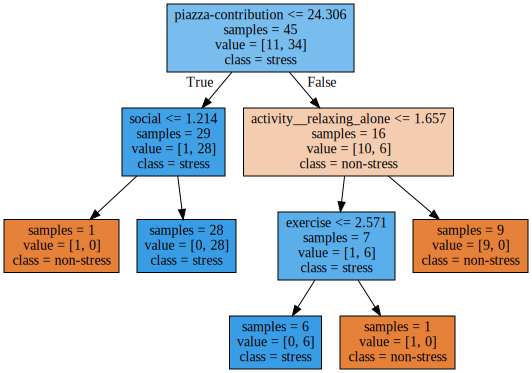

In [276]:
feature_names = join_df_classified.iloc[:,1:-1].columns.tolist()
# target_names = ['0','1']
target_names = ['non-stress','stress']
plot_decision_tree(clf, feature_names, target_names)

In [249]:
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import matplotlib.pyplot as plt

X = join_df_classified.iloc[:,1:-1].astype('float64')
y = join_df_classified.iloc[:,-1].astype('float64')
y = y.replace(np.nan,0)  # replace np.nan to 0

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

counter_lst = collections.Counter(y_pred)
print(counter_lst[1]/len(y_pred))  # 0.73

0.7333333333333333


/anaconda3/envs/si618/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [245]:
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF classifier on test set: 0.80


Random forest classifier would classify 73% of the students to be "stress", which is pretty close to our baseline -- 75% of students are perceived as "stress". Also the classifier work pretty well with a 80% accuracy. It's slightly smaller than the 75% baseline though, probably because I convert the NA values to 0.

In [259]:
join_df.columns.tolist()

['user_id',
 ' gpa all',
 'piazza-contribution',
 'perceived-stress-scale-survey-pre',
 'perceived-stress-scale-survey-post',
 'sleep',
 'exercise',
 'social',
 'activity__working_alone',
 'activity__working_others',
 'activity__relaxing_alone',
 'activity__relaxing_others',
 'behavior__anxious',
 'behavior__calm',
 'behavior__conventional',
 'behavior__critical',
 'behavior__dependable',
 'behavior__disorganized',
 'behavior__enthusiastic',
 'behavior__experiences',
 'behavior__reserved',
 'behavior__sympathetic',
 'mood__happy',
 'mood__sad',
 'stress_or_not']

In [261]:
#### evaluate baseline 1 - prediction
join_df_regr = join_df.drop(columns = ['perceived-stress-scale-survey-post','stress_or_not'])
join_df_regr.head()

,user_id,gpa all,piazza-contribution,perceived-stress-scale-survey-pre,sleep,exercise,social,activity__working_alone,activity__working_others,activity__relaxing_alone,...,behavior__conventional,behavior__critical,behavior__dependable,behavior__disorganized,behavior__enthusiastic,behavior__experiences,behavior__reserved,behavior__sympathetic,mood__happy,mood__sad
0,0,NaN,144.0,3.6,7.109091,2.000000,2.954545,2.052632,2.684211,1.578947,...,2.714286,1.142857,3.714286,1.428571,2.714286,2.142857,3.285714,3.142857,1.50,1.50
1,1,2.863,5.0,3.1,7.222222,1.000000,3.500000,1.666667,2.000000,2.333333,...,4.000000,1.000000,3.333333,1.666667,3.000000,2.666667,3.000000,1.666667,2.00,1.00
2,2,3.505,0.0,2.9,7.923077,2.000000,2.800000,2.250000,2.375000,1.000000,...,2.000000,3.600000,3.400000,2.200000,3.200000,2.400000,3.400000,1.800000,1.00,1.00
3,3,NaN,30.0,1.9,8.071429,1.875000,1.550000,2.545455,1.090909,1.909091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
4,4,3.029,1.0,2.9,6.470588,4.083333,3.074074,1.923077,1.846154,2.846154,...,2.760870,2.369565,3.826087,2.195652,2.847826,2.739130,3.934783,3.717391,1.75,1.75


In [284]:
mean_stress_scale = np.mean(join_df['perceived-stress-scale-survey-pre'])

In [307]:
from sklearn.ensemble import RandomForestRegressor

X = join_df_regr.loc[:, join_df_regr.columns != 'perceived-stress-scale-survey-pre'].values
y = join_df_regr['perceived-stress-scale-survey-pre'].replace(np.nan, mean_stress_scale).values

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

regr = RandomForestRegressor().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Accuracy of RF classifier on test set: {:.2f}'
     .format(regr.score(X_test, y_test)))

Accuracy of RF classifier on test set: 0.06


/anaconda3/envs/si618/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [308]:
np.mean(y_pred)

3.090458937201015

The mean stress scale predicted using random forest regressor is roughly 3, which is quite close to but slightly smaller than the mean stress scale from original dataset (3.086). However, the accuracy og the random forest regression model is pretty low (only roughly about 0 percent), To handle the missing data, I convert NA values to mean stress scale value. And if I convert the missing value to 0, and regression model would yield an higher accuracy (about 40%) yet the predicted value (about 2) is even far from 3.086.